In [1]:
import rpSBML
import rpGraph
import rpDraw
import matplotlib.pyplot as plt
import networkx as nx
import logging

In [2]:
logging.basicConfig()
logging.root.setLevel(logging.NOTSET)
logging.basicConfig(level=logging.NOTSET)

logging.basicConfig(
    level=logging.DEBUG,
    #level=logging.WARNING,
    #level=logging.ERROR,
    format='%(asctime)s.%(msecs)03d %(levelname)s %(module)s - %(funcName)s: %(message)s',
    datefmt='%d-%m-%Y %H:%M:%S',
)

In [3]:
root_path = '/home/mdulac/Downloads/'
#root_path = '/Users/melchior/Downloads'

#rpsbml = rpSBML.rpSBML('test', path='rp_1_3.sbml.xml')
#BUG BUG in the ordering of reactions
#rpsbml = rpSBML.rpSBML('test', path=root_path+'Galaxy1442-[FBA]/rp_3_8.sbml.xml')
#rpsbml = rpSBML.rpSBML('test', path=root_path+'Galaxy1442-[FBA]/rp_18_1.sbml.xml')
rpsbml = rpSBML.rpSBML('test', path=root_path+'Galaxy1442-[FBA]/rp_16_1.sbml.xml')


#rpsbml = rpSBML.rpSBML('test', path=root_path+'rpglobalscore_101/rp_5_4.sbml.xml')

rpgraph = rpGraph.rpGraph(rpsbml)
rpdraw = rpDraw.rpDraw()
target = [i for i in list(rpgraph.G.nodes) if 'TARGET' in i][0]

DEBUG:rpSBML:Started instance of rpSBML
DEBUG:rpGraph:Started instance of rpGraph


In [3]:
pathway = [{'reactants_inchi': ['InChI=1S/C10H13N5O3/c11-9-8-10(13-3-12-9)15(4-14-8)7-1-5(17)6(2-16)18-7/h3-7,16-17H,1-2H2,(H2,11,12,13)/t5-,6+,7+/m0/s1'],
            'products_inchi': ['InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H', 'InChI=1S/C6H6O4/c7-5(8)3-1-2-4-6(9)10/h1-4H,(H,7,8)(H,9,10)/b3-1+,4-2+', 'InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'cofactor_reactants': ['NADP', 'ATP'], 
            'cofactor_products': ['ADP']
           },
      
           {'reactants_inchi': ['InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H', 'InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'products_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'cofactor_reactants': [], 
            'cofactor_products': []
           },
        
           {'reactants_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3', 'InChI=1S/C3H5O.Zn/c1-3(2)4;/h1H2,2H3;/q-1;'],
            'products_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3/i1+1,2+1', 'InChI=1S/C3H5O.Zn/c1-3(2)4;/h1H2,2H3;/q-1;'],
            'cofactor_reactants': [], 
            'cofactor_products': []
           }
           
          ]

In [9]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, target, plot_only_central=True, filter_cofactors=True)

In [7]:
pos

{'TARGET_0000000001__64__MNXC3': (0.5, 0),
 'RP1': (0.5, -0.2),
 'CMPD_0000000001__64__MNXC3': (0.16666666666666666, -0.4),
 'RP3': (0.5, -0.6000000000000001),
 'CMPD_0000000010__64__MNXC3': (0.5, -0.8),
 'RP4': (0.5, -1.0),
 'MNXM89557__64__MNXC3': (0.5, -1.2),
 'CMPD_0000000003__64__MNXC3': (0.5, -0.4),
 'RP2': (0.5, -0.6000000000000001),
 'MNXM23__64__MNXC3': (0.8333333333333333, -0.4)}

In [26]:
pathway = []
inchi_pathway = []
ordered_y = sorted(list(set([pos[i][1] for i in pos])))
for layer_y_loc in ordered_y:
    ordered_x = sorted(list(set([pos[i][0] for i in pos if pos[i][1]==layer_y_loc])))
    reaction = []
    inchi = []
    for layer_x_loc in ordered_x:
        for node_id in pos:
            if pos[node_id][1]==layer_y_loc and pos[node_id][0]==layer_x_loc:
                n = newG.nodes.get(node_id)
                try:
                    inchi.append(newG.nodes.get(node_id)['brsynth']['inchi'])
                except KeyError:
                    pass
                reaction.append(node_id)
                break
    if all([newG.nodes.get(i)['type']=='reaction' for i in reaction]):
        continue
    pathway.append(reaction)
    inchi_pathway.append(inchi)

In [27]:
pathway

[['MNXM89557__64__MNXC3'],
 ['CMPD_0000000010__64__MNXC3'],
 ['CMPD_0000000001__64__MNXC3',
  'CMPD_0000000003__64__MNXC3',
  'MNXM23__64__MNXC3'],
 ['TARGET_0000000001__64__MNXC3']]

In [28]:
inchi_pathway

[['InChI=1S/C5H9NO4/c6-3(5(9)10)1-2-4(7)8/h3H,1-2,6H2,(H,7,8)(H,9,10)/p-1/t3-/m0/s1'],
 ['InChI=1S/C4H9NO2/c5-3-1-2-4(6)7/h1-3,5H2,(H,6,7)'],
 ['InChI=1S/C4H9NO/c5-3-1-2-4-6/h4H,1-3,5H2',
  'InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5,6)',
  'InChI=1S/C3H4O3/c1-2(4)3(5)6/h1H3,(H,5,6)/p-1'],
 ['InChI=1S/C4H12N2/c5-3-1-2-4-6/h1-6H2']]

DEBUG:rpDraw:####################### TARGET_0000000001__64__c #######################
DEBUG:rpDraw:parsed:		[]
DEBUG:rpDraw:saw_first:	[]
DEBUG:rpDraw:x --> 0.5
DEBUG:rpDraw:y --> 0
DEBUG:rpDraw:neighbors:		['RP1']
DEBUG:rpDraw:layer_neighbors:	['RP1']
DEBUG:rpDraw:parent_neighbors:	[]
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'species', 'name': 'TARGET_0000000001', 'miriam': {}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'smiles': '[H]N([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])N([H])[H]', 'inchi': 'InChI=1S/C4H12N2/c5-3-1-2-4-6/h1-6H2', 'inchikey': 'KIDHWZJUCRJVML-UHFFFAOYSA-N'}, 'central_species': True}
DEBUG:rpDraw:xcenter: 0.5
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: -0.5
DEBUG:rpDraw:	neighbor -> RP1
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.5
DEBUG:rpDraw:	vert_loc: -0.2
DEBUG:rpDraw:==============================================
DEBUG:rpDraw:####################### RP1 #######################
DEBUG:rpDraw:pa

DEBUG:rpDraw:	MNXM1__64__c is not a central species
DEBUG:rpDraw:	MNXM13__64__c is not a central species
DEBUG:rpDraw:neighbors:		['CMPD_0000000009__64__c', 'CMPD_0000000003__64__c']
DEBUG:rpDraw:layer_neighbors:	['CMPD_0000000009__64__c']
DEBUG:rpDraw:parent_neighbors:	['RP2']
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'reaction', 'miriam': {'ec-code': ['4.1.1.12']}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'path_id': {'value': 18}, 'step_id': {'value': 2}, 'sub_step_id': {'value': 1}, 'rule_score': {'value': 1.0}, 'smiles': '[H]OC(=O)C([H])(N([H])[H])C([H])([H])[H].O=C=O>>[H]OC(=O)C([H])([H])C([H])(C(=O)O[H])N([H])[H].[H+]', 'rule_id': 'RR-02-ad84bdcdbd3e9135-16-F', 'rule_ori_reac': '<brsynth:mnxr value="MNXR96078"/>'}}
DEBUG:rpDraw:xcenter: 1.0
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: 0.0
DEBUG:rpDraw:	neighbor -> CMPD_0000000009__64__c
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.5
DEBUG:rpDraw:	vert_loc: -0.8
DEBUG:rpD

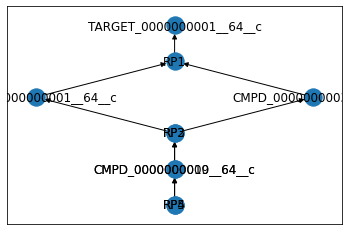

In [22]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, target, plot_only_central=True, filter_cofactors=True)
nx.draw_networkx(newG, pos=pos)

DEBUG:rpDraw:####################### TARGET_0000000001__64__c #######################
DEBUG:rpDraw:parsed:		[]
DEBUG:rpDraw:saw_first:	[]
DEBUG:rpDraw:x --> 0.5
DEBUG:rpDraw:y --> 0
DEBUG:rpDraw:neighbors:		['RP1']
DEBUG:rpDraw:layer_neighbors:	['RP1']
DEBUG:rpDraw:parent_neighbors:	[]
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'species', 'name': 'TARGET_0000000001', 'miriam': {}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'smiles': '[H]N([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])N([H])[H]', 'inchi': 'InChI=1S/C4H12N2/c5-3-1-2-4-6/h1-6H2', 'inchikey': 'KIDHWZJUCRJVML-UHFFFAOYSA-N'}, 'central_species': True}
DEBUG:rpDraw:xcenter: 0.5
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: -0.5
DEBUG:rpDraw:	neighbor -> RP1
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.5
DEBUG:rpDraw:	vert_loc: -0.2
DEBUG:rpDraw:==============================================
DEBUG:rpDraw:####################### RP1 #######################
DEBUG:rpDraw:pa

DEBUG:rpDraw:parsed:		['TARGET_0000000001__64__c', 'RP1', 'CMPD_0000000001__64__c', 'RP3', 'MNXM1__64__c', 'RP2']
DEBUG:rpDraw:saw_first:	['MNXM6__64__c', 'CMPD_0000000003__64__c', 'CMPD_0000000010__64__c', 'MNXM5__64__c', 'MNXM23__64__c', 'MNXM13__64__c', 'RP4', 'MNXM2__64__c', 'RP5']
DEBUG:rpDraw:x --> 0.25
DEBUG:rpDraw:y --> -1.2
DEBUG:rpDraw:neighbors:		['RP2']
DEBUG:rpDraw:	neighbor -> MNXM13__64__c
DEBUG:rpDraw:	width: 0.5
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.75
DEBUG:rpDraw:	vert_loc: -1.2
DEBUG:rpDraw:==============================================
DEBUG:rpDraw:####################### MNXM13__64__c #######################
DEBUG:rpDraw:parsed:		['TARGET_0000000001__64__c', 'RP1', 'CMPD_0000000001__64__c', 'RP3', 'MNXM1__64__c', 'RP2', 'CMPD_0000000009__64__c']
DEBUG:rpDraw:saw_first:	['MNXM6__64__c', 'CMPD_0000000003__64__c', 'CMPD_0000000010__64__c', 'MNXM5__64__c', 'CMPD_0000000009__64__c', 'MNXM23__64__c', 'RP4', 'MNXM2__64__c', 'RP5']
DEBUG:rpDraw:x --> 0.75
D

DEBUG:rpDraw:	vert_loc: -0.8
DEBUG:rpDraw:==============================================
DEBUG:rpDraw:####################### CMPD_0000000010__64__c #######################
DEBUG:rpDraw:parsed:		['TARGET_0000000001__64__c', 'RP1', 'CMPD_0000000001__64__c', 'RP3', 'MNXM1__64__c', 'RP2', 'CMPD_0000000009__64__c', 'MNXM13__64__c', 'RP4', 'MNXM15__64__c', 'MNXM46__64__c', 'RP5', 'MNXM89557__64__c']
DEBUG:rpDraw:saw_first:	['MNXM6__64__c', 'CMPD_0000000003__64__c', 'MNXM5__64__c', 'MNXM1__64__c', 'MNXM23__64__c', 'MNXM2__64__c']
DEBUG:rpDraw:x --> 0.30000000000000004
DEBUG:rpDraw:y --> -0.8
DEBUG:rpDraw:neighbors:		['RP5', 'RP3']
DEBUG:rpDraw:layer_neighbors:	['RP5']
DEBUG:rpDraw:parent_neighbors:	['MNXM1__64__c', 'CMPD_0000000010__64__c', 'MNXM6__64__c', 'MNXM2__64__c', 'MNXM5__64__c']
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'species', 'name': 'CMPD_0000000010', 'miriam': {}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'smiles': '[H]OC(=O)C([H])([H])C([H])([H])C(

DEBUG:rpDraw:x --> 0.8999999999999999
DEBUG:rpDraw:y --> -0.8
DEBUG:rpDraw:neighbors:		['RP3', 'RP4']
DEBUG:rpDraw:layer_neighbors:	['RP4']
DEBUG:rpDraw:parent_neighbors:	['MNXM1__64__c', 'CMPD_0000000010__64__c', 'MNXM6__64__c', 'MNXM2__64__c', 'MNXM5__64__c']
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'species', 'name': 'NADP(+)', 'miriam': {'seed': ['cpd00006'], 'sabiork': ['1263'], 'reactome': ['R-ALL-6790191', 'R-ALL-5623650', 'R-ALL-389556', 'R-ALL-351628', 'R-ALL-29366', 'R-ALL-2000348', 'R-ALL-194668', 'R-ALL-113564', 'R-ALL-113563'], 'metacyc': ['NADP'], 'hmdb': ['HMDB00217'], 'chebi': ['58349', '44405', '13397', '44409', '25523', '7424', '29868', '21903', '13398', '18009'], 'metanetx': ['MNXM96408', 'MNXM89560', 'MNXM64103', 'MNXM588022', 'MNXM5'], 'bigg': ['M_nadp', 'nadp']}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'smiles': 'N=C(O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1', 'inchi': 'InChI=1S/C21H28N7O1

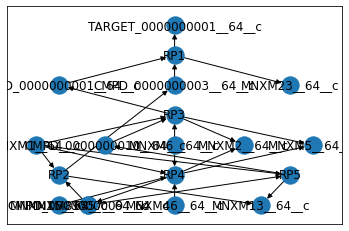

In [7]:
newG, pos = rpdraw._hierarchy_pos_recursive(rpgraph.G, target, plot_only_central=False, filter_cofactors=False)
nx.draw_networkx(newG, pos=pos)

DEBUG:rpDraw:	TARGET_0000000001__64__c --> ['RP1']
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000001__64__c', 'CMPD_0000000003__64__c']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__c', 'MNXM23__64__c']
DEBUG:rpDraw:==================================
DEBUG:rpDraw:toadd_nodes: ['CMPD_0000000001__64__c', 'CMPD_0000000003__64__c', 'MNXM13__64__c', 'CMPD_0000000009__64__c', 'MNXM1__64__c', 'MNXM2__64__c', 'MNXM5__64__c', 'CMPD_0000000010__64__c', 'MNXM6__64__c', 'MNXM15__64__c', 'MNXM46__64__c', 'MNXM89557__64__c', 'RP1', 'RP2', 'RP3', 'RP4', 'RP5']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__c', 'MNXM23__64__c']
DEBUG:rpDraw:	TARGET_0000000001__64__c --> ['RP1']
DEBUG:rpDraw:	Adding node: RP1
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000001__64__c', 'CMPD_0000000003__64__c']
DEBUG:rpDraw:		CMPD_0000000001__64__c type: species
DEBUG:rpDraw:		CMPD_0000000003__64__c type: species
DEBUG:rpDraw:	MNXM23__64__c --> ['RP1']
DEBUG:rpDraw:layer: ['RP1']
DEBUG:rpDraw:pos: {'TARGET_000

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymB

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (Arial_Italic.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Laksaman' (Laksaman-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstQurn' (KacstQurn.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trebuchet MS' (Trebuchet_MS_Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Mono' (NotoMono-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstScreen' (KacstScreen.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstOffice' (KacstOffice.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-L.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 4.971363636363637
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotl

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (Times_New_Roman_Italic.ttf) italic normal roman normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (Comic_Sans_MS_Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (Comic_Sans_MS.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Vemana2000' (vemana2000.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.3

DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstNaskh' (KacstNaskh.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 7.698636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Black' (Arial_Black.ttf) normal normal black normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 4.6863636363636365
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 0.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sawasdee' (Sawasdee-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/mdulac/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


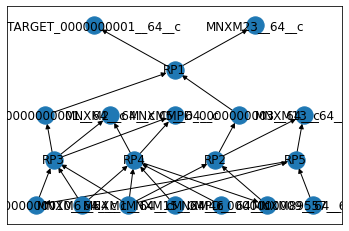

In [4]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, target, plot_only_central=False, filter_cofactors=False)
nx.draw_networkx(newG, pos=pos)

DEBUG:rpDraw:####################### TARGET_0000000001__64__c #######################
DEBUG:rpDraw:parsed:		[]
DEBUG:rpDraw:saw_first:	[]
DEBUG:rpDraw:x --> 0.5
DEBUG:rpDraw:y --> 0
DEBUG:rpDraw:neighbors:		['RP1']
DEBUG:rpDraw:layer_neighbors:	['RP1']
DEBUG:rpDraw:parent_neighbors:	[]
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'species', 'name': 'TARGET_0000000001', 'miriam': {}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'smiles': '[H]N([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])N([H])[H]', 'inchi': 'InChI=1S/C4H12N2/c5-3-1-2-4-6/h1-6H2', 'inchikey': 'KIDHWZJUCRJVML-UHFFFAOYSA-N'}, 'central_species': True}
DEBUG:rpDraw:xcenter: 0.5
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: -0.5
DEBUG:rpDraw:	neighbor -> RP1
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.5
DEBUG:rpDraw:	vert_loc: -0.2
DEBUG:rpDraw:==============================================
DEBUG:rpDraw:####################### RP1 #######################
DEBUG:rpDraw:pa

DEBUG:rpDraw:	MNXM1__64__c is not a central species
DEBUG:rpDraw:	MNXM13__64__c is not a central species
DEBUG:rpDraw:neighbors:		['CMPD_0000000009__64__c', 'CMPD_0000000003__64__c']
DEBUG:rpDraw:layer_neighbors:	['CMPD_0000000009__64__c']
DEBUG:rpDraw:parent_neighbors:	['RP2']
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'reaction', 'miriam': {'ec-code': ['4.1.1.12']}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'path_id': {'value': 18}, 'step_id': {'value': 2}, 'sub_step_id': {'value': 1}, 'rule_score': {'value': 1.0}, 'smiles': '[H]OC(=O)C([H])(N([H])[H])C([H])([H])[H].O=C=O>>[H]OC(=O)C([H])([H])C([H])(C(=O)O[H])N([H])[H].[H+]', 'rule_id': 'RR-02-ad84bdcdbd3e9135-16-F', 'rule_ori_reac': '<brsynth:mnxr value="MNXR96078"/>'}}
DEBUG:rpDraw:xcenter: 0.5
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: -0.5
DEBUG:rpDraw:	neighbor -> CMPD_0000000009__64__c
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.5
DEBUG:rpDraw:	vert_loc: -0.8
DEBUG:rp

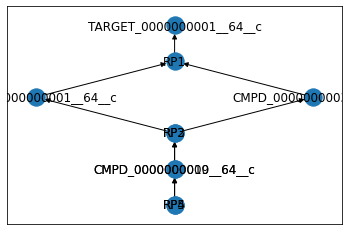

In [10]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, target, plot_only_central=True, filter_cofactors=False)
nx.draw_networkx(newG, pos=pos)

In [4]:
b, len_x, len_y = rpgraph._drawPathway(pathway, arrow_gap_size=50, react_arrow_size=30)
open('test_pathway.svg', 'w').write(b)

AttributeError: 'rpGraph' object has no attribute '_drawPathway'

DEBUG:rpDraw:####################### TARGET_0000000001__64__c #######################
DEBUG:rpDraw:parsed:		[]
DEBUG:rpDraw:saw_first:	[]
DEBUG:rpDraw:x --> 0.5
DEBUG:rpDraw:y --> 0
DEBUG:rpDraw:neighbors:		['RP1']
DEBUG:rpDraw:layer_neighbors:	['RP1']
DEBUG:rpDraw:parent_neighbors:	[]
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'species', 'name': 'TARGET_0000000001', 'miriam': {}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'smiles': '[H]N([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])N([H])[H]', 'inchi': 'InChI=1S/C4H12N2/c5-3-1-2-4-6/h1-6H2', 'inchikey': 'KIDHWZJUCRJVML-UHFFFAOYSA-N'}, 'central_species': True}
DEBUG:rpDraw:xcenter: 0.5
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: -0.5
DEBUG:rpDraw:	neighbor -> RP1
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.5
DEBUG:rpDraw:	vert_loc: -0.2
DEBUG:rpDraw:==============================================
DEBUG:rpDraw:####################### RP1 #######################
DEBUG:rpDraw:pa

DEBUG:rpDraw:parsed:		['TARGET_0000000001__64__c', 'RP1', 'CMPD_0000000001__64__c', 'RP3', 'MNXM1__64__c', 'RP2']
DEBUG:rpDraw:saw_first:	['CMPD_0000000010__64__c', 'MNXM23__64__c', 'MNXM6__64__c', 'MNXM2__64__c', 'RP5', 'MNXM5__64__c', 'CMPD_0000000003__64__c', 'MNXM13__64__c']
DEBUG:rpDraw:x --> 0.25
DEBUG:rpDraw:y --> -1.2
DEBUG:rpDraw:neighbors:		['RP4', 'RP2']
DEBUG:rpDraw:layer_neighbors:	['RP4']
DEBUG:rpDraw:parent_neighbors:	['CMPD_0000000009__64__c', 'MNXM13__64__c']
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'species', 'name': 'CMPD_0000000009', 'miriam': {}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'smiles': '[H]OC(=O)C([H])([H])C([H])(C(=O)O[H])N([H])[H]', 'inchi': 'InChI=1S/C4H7NO4/c5-2(4(8)9)1-3(6)7/h2H,1,5H2,(H,6,7)(H,8,9)', 'inchikey': 'CKLJMWTZIZZHCS-UHFFFAOYSA-N'}, 'central_species': True}
DEBUG:rpDraw:xcenter: 0.5
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: -0.5
DEBUG:rpDraw:	neighbor -> RP4
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 

DEBUG:rpDraw:saw_first:	['CMPD_0000000010__64__c', 'RP2', 'MNXM23__64__c', 'MNXM89557__64__c', 'MNXM6__64__c', 'MNXM2__64__c', 'MNXM5__64__c', 'CMPD_0000000003__64__c']
DEBUG:rpDraw:	neighbor -> CMPD_0000000010__64__c
DEBUG:rpDraw:	width: 0.2
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.8
DEBUG:rpDraw:	vert_loc: -0.8
DEBUG:rpDraw:==============================================
DEBUG:rpDraw:####################### CMPD_0000000010__64__c #######################
DEBUG:rpDraw:parsed:		['TARGET_0000000001__64__c', 'RP1', 'CMPD_0000000001__64__c', 'RP3', 'MNXM1__64__c', 'RP2', 'CMPD_0000000009__64__c', 'RP4', 'MNXM46__64__c', 'MNXM89557__64__c', 'MNXM20__64__c', 'MNXM13__64__c', 'RP5']
DEBUG:rpDraw:saw_first:	['MNXM23__64__c', 'MNXM6__64__c', 'MNXM2__64__c', 'MNXM1__64__c', 'CMPD_0000000003__64__c', 'MNXM5__64__c']
DEBUG:rpDraw:x --> 0.8
DEBUG:rpDraw:y --> -0.8
DEBUG:rpDraw:neighbors:		['RP5', 'RP3']
DEBUG:rpDraw:layer_neighbors:	['RP5']
DEBUG:rpDraw:parent_neighbors:	['MNXM1__64__c',

DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regula

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (Arial_Italic.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Laksaman' (Laksaman-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstQurn' (KacstQurn.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trebuchet MS' (Trebuchet_MS_Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Mono' (NotoMono-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstScreen' (KacstScreen.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstOffice' (KacstOffice.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-L.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 4.971363636363637
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotl

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (Times_New_Roman_Italic.ttf) italic normal roman normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (Comic_Sans_MS_Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (Comic_Sans_MS.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Vemana2000' (vemana2000.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.3

DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstNaskh' (KacstNaskh.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 7.698636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Black' (Arial_Black.ttf) normal normal black normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 4.6863636363636365
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 0.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sawasdee' (Sawasdee-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/mdulac/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


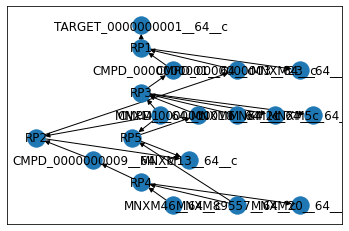

In [7]:
newG, pos = rpdraw._hierarchy_pos_2(rpgraph.G, target, plot_only_central=False, filter_cofactors=False)
nx.draw_networkx(newG, pos=pos)